<a href="https://colab.research.google.com/github/SantiagoMorenoV/Combined-Cycle-Power-Plant/blob/main/Models/Combined_Cycle_Power_Plant_Dec_Tree_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Combined Cycle Power Plant - Decision Tree Regression**

The "Combined Cycle Power Plant" dataset contains the following features (variables):

* **Temperature (T):** The temperature measured in °C.

* **Ambient Pressure (AP):** The ambient pressure measured in millibars.

* **Relative Humidity (RH):** The relative humidity measured in percent.

* **Exhaust Vacuum (V):** The exhaust vacuum measured in cm Hg.

* **Electrical Energy Output (EP):** The electrical energy output of the power plant measured in MW.

These features are used to estimate the electrical energy output of a combined cycle power plant. Each instance in the dataset represents a specific combination of these features and the corresponding electrical energy output.

For this purpose, I will estimate a *decision tree regression* model and obtain its determination coefficient.

##Importing the libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##Importing the dataset

In [60]:
dataset = pd.read_csv('CCPP_data.csv')
X = dataset.iloc[:, :-1].values
y=  dataset.iloc[:, -1].values
dataset.head(10)

,Temperature (AT),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Plant Electricity (PE)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


## **Descriptive Statistics**

In [61]:
print("\033[36m\033[6m{:^50}\033[0m".format("Descriptive Statistics"))
dataset.describe().T

              Descriptive Statistics              


,count,mean,std,min,25%,50%,75%,max
Temperature (AT),9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
Exhaust Vacuum (V),9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
Ambient Pressure (AP),9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
Relative Humidity (RH),9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
Plant Electricity (PE),9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


##**Distributions and Boxplots**

## **Histograms**

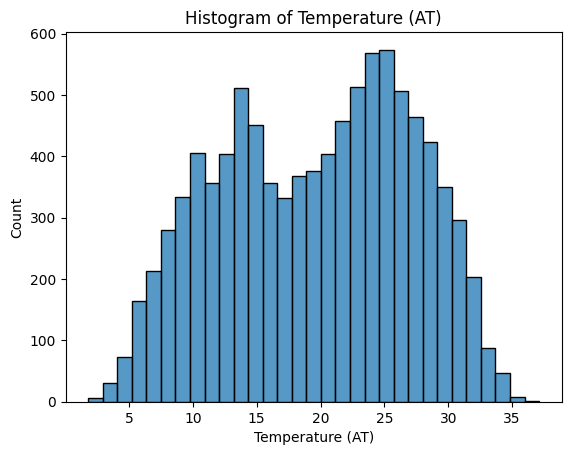

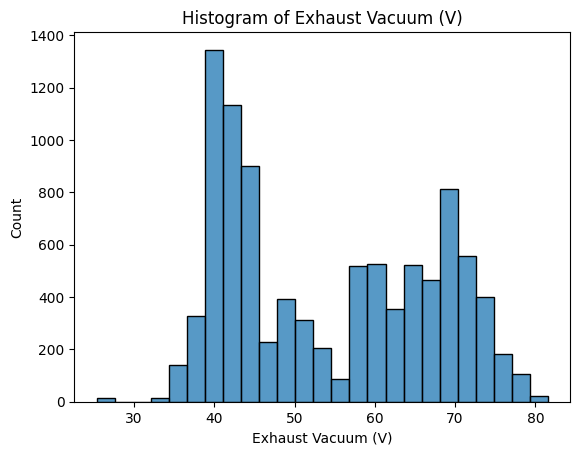

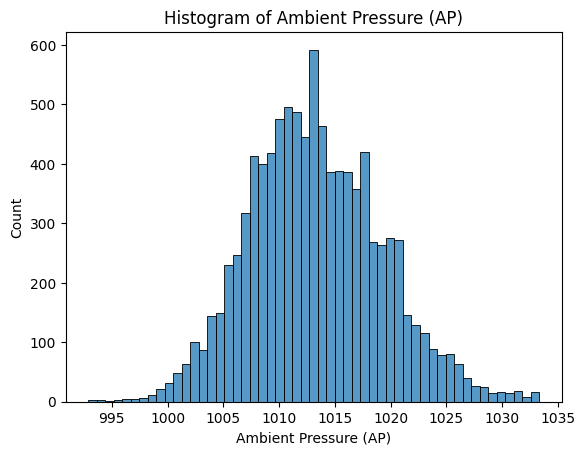

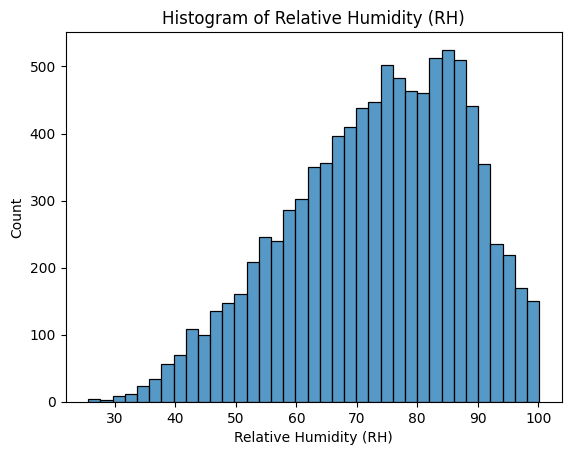

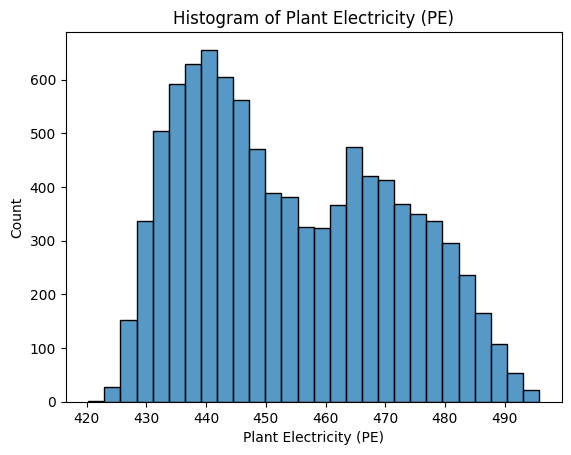

In [62]:
# Selecting our variables
variables = ["Temperature (AT)", "Exhaust Vacuum (V)", "Ambient Pressure (AP)", "Relative Humidity (RH)", "Plant Electricity (PE)"]

# Creating histograms
for var in variables:
  sns.histplot(data = dataset, x = var)
  plt.title("Histogram of {}".format(var))
  plt.show()

##**Boxplots**

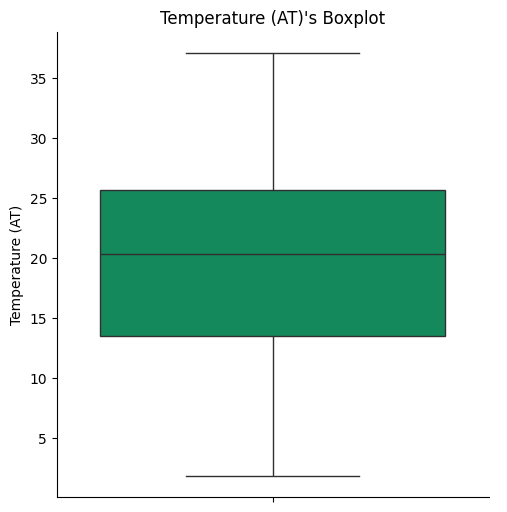

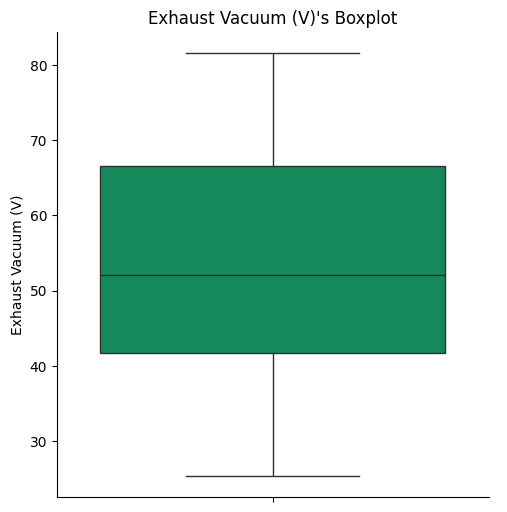

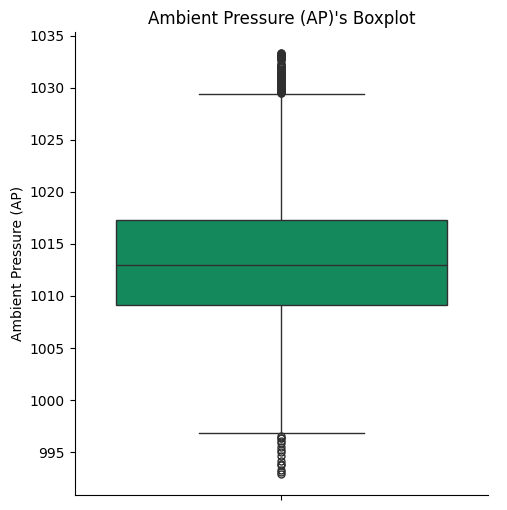

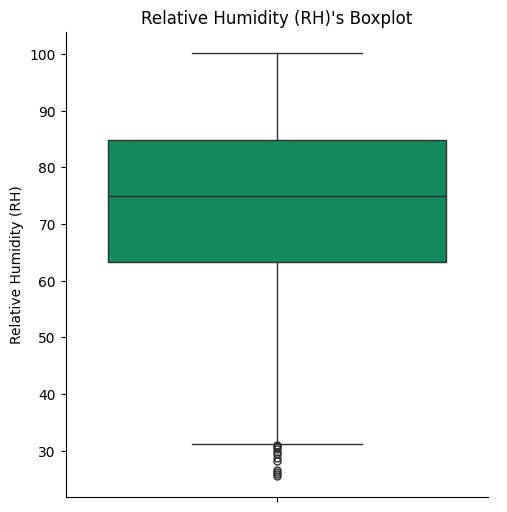

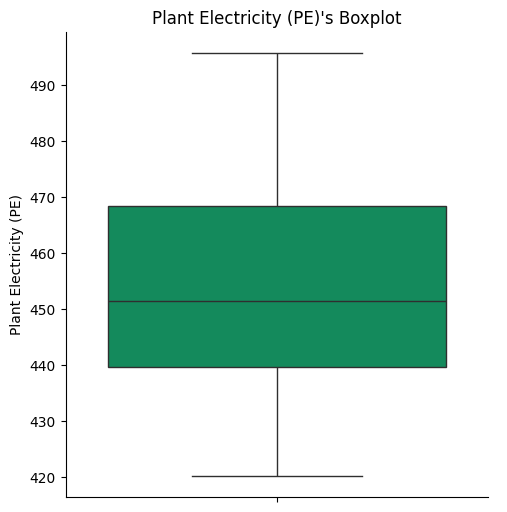

In [63]:
# Creting Boxplots
for var in variables:
  sns.catplot(data=dataset, y = var, kind = "box", color = "#009E60")
  plt.title("{}'s Boxplot".format(var))
  plt.show()

## **Correlation Matrix**

In [64]:
variables = ["Temperature (AT)", "Exhaust Vacuum (V)", "Ambient Pressure (AP)", "Relative Humidity (RH)", "Plant Electricity (PE)"]

correlation_matrix = dataset[variables].corr()
correlation_matrix

,Temperature (AT),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Plant Electricity (PE)
Temperature (AT),1.000000,0.844107,-0.507549,-0.542535,-0.948128
Exhaust Vacuum (V),0.844107,1.000000,-0.413502,-0.312187,-0.869780
Ambient Pressure (AP),-0.507549,-0.413502,1.000000,0.099574,0.518429
Relative Humidity (RH),-0.542535,-0.312187,0.099574,1.000000,0.389794
Plant Electricity (PE),-0.948128,-0.869780,0.518429,0.389794,1.000000


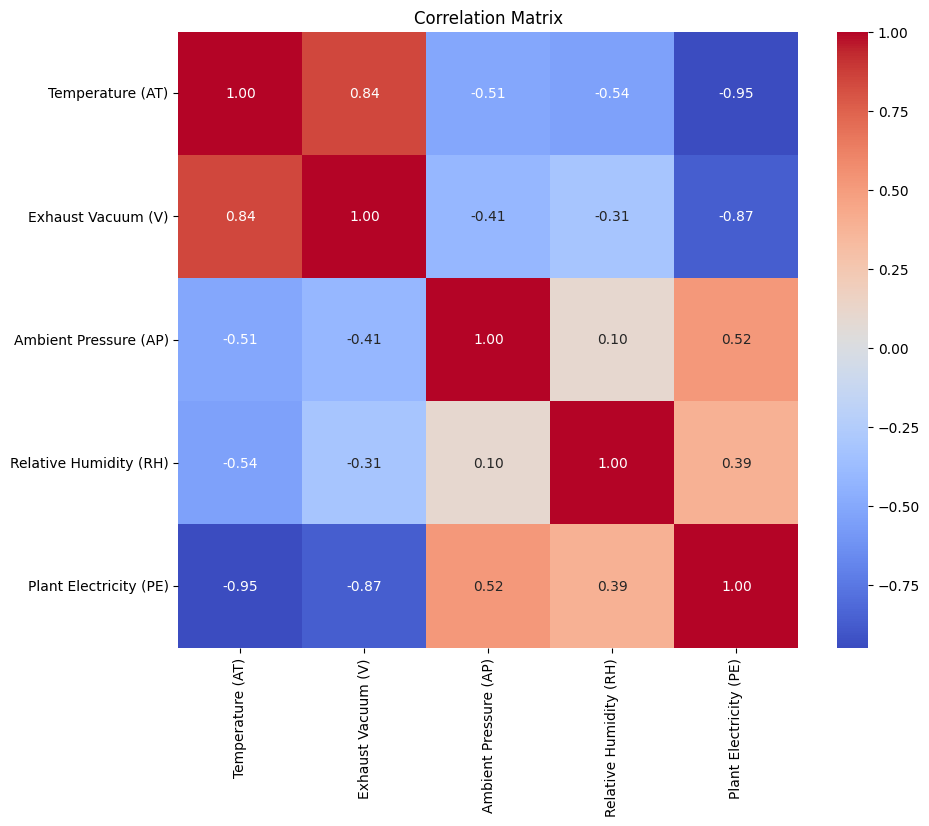

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#**Splitting the dataset into the Training and Test sets**

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# **Training the Decision Tree Regression model on the Training set**

In [67]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

#**Predicting the Test set results**

In [68]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


In [69]:
accuracyScore = pd.DataFrame(columns=['Algorithm', 'R2 Score'])

# **Evaluating the Model Performance**

In [70]:
from sklearn.metrics import r2_score

new_row = pd.DataFrame({'Algorithm': "Decision Tree Regressor", 'R2 Score': [r2_score(y_test, y_pred)]})

accuracyScore = pd.concat([accuracyScore, new_row], ignore_index=True)
accuracyScore

/tmp/ipykernel_3067/1686015056.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracyScore = pd.concat([accuracyScore, new_row], ignore_index=True)


,Algorithm,R2 Score
0,Decision Tree Regressor,0.922906


Training the Multiple Linear Regression model on the Training set


In [71]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

Predicting the Test set results

In [72]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


In [73]:
from sklearn.metrics import r2_score
new_row = pd.DataFrame({'Algorithm': "Linear Regression", 'R2 Score': [r2_score(y_test, y_pred)]})
accuracyScore = pd.concat([accuracyScore, new_row], ignore_index=True)
accuracyScore

,Algorithm,R2 Score
0,Decision Tree Regressor,0.922906
1,Linear Regression,0.932532


Training the Polynomial Regression model on the Training set


In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [75]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]


In [76]:
from sklearn.metrics import r2_score

new_row = pd.DataFrame({'Algorithm': "Polynomial Regression", 'R2 Score': [r2_score(y_test, y_pred)]})
accuracyScore = pd.concat([accuracyScore, new_row], ignore_index=True)

Training the Random Forest Regression model on the Training set


In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [78]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
     

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


In [79]:
from sklearn.metrics import r2_score
new_row = pd.DataFrame({'Algorithm': "Polynomial Regression", 'R2 Score': [r2_score(y_test, y_pred)]})
accuracyScore = pd.concat([accuracyScore, new_row], ignore_index=True)
accuracyScore

,Algorithm,R2 Score
0,Decision Tree Regressor,0.922906
1,Linear Regression,0.932532
2,Polynomial Regression,0.945819
3,Polynomial Regression,0.961591


In [80]:
print(accuracyScore)

                 Algorithm  R2 Score
0  Decision Tree Regressor  0.922906
1        Linear Regression  0.932532
2    Polynomial Regression  0.945819
3    Polynomial Regression  0.961591
